In [1]:
import django
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
os.chdir("..")
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'ecommerce.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

In [3]:
from shop.models import Product

In [4]:
response = requests.get('https://fakestoreapi.com/products')
products_data = response.json()

In [5]:
df_products = pd.DataFrame(products_data)

In [6]:
df_products = df_products.rename(columns={
    'id': 'id',
    'title': 'title',
    'price': 'price',
    'category': 'category',
    'description': 'description',
    'image': 'image'
})

In [7]:
df_products = df_products.drop(columns=['rating'], errors='ignore')
products_dict = df_products.to_dict('records')

In [8]:
Product.objects.bulk_create(
    [Product(**vals) for vals in products_dict],
    batch_size=1000,
    ignore_conflicts=True
)


[<Product: Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops>,
 <Product: Mens Casual Premium Slim Fit T-Shirts >,
 <Product: Mens Cotton Jacket>,
 <Product: Mens Casual Slim Fit>,
 <Product: John Hardy Women's Legends Naga Gold & Silver Dragon Station Chain Bracelet>,
 <Product: Solid Gold Petite Micropave >,
 <Product: White Gold Plated Princess>,
 <Product: Pierced Owl Rose Gold Plated Stainless Steel Double>,
 <Product: WD 2TB Elements Portable External Hard Drive - USB 3.0 >,
 <Product: SanDisk SSD PLUS 1TB Internal SSD - SATA III 6 Gb/s>,
 <Product: Silicon Power 256GB SSD 3D NAND A55 SLC Cache Performance Boost SATA III 2.5>,
 <Product: WD 4TB Gaming Drive Works with Playstation 4 Portable External Hard Drive>,
 <Product: Acer SB220Q bi 21.5 inches Full HD (1920 x 1080) IPS Ultra-Thin>,
 <Product: Samsung 49-Inch CHG90 144Hz Curved Gaming Monitor (LC49HG90DMNXZA) – Super Ultrawide Screen QLED >,
 <Product: BIYLACLESEN Women's 3-in-1 Snowboard Jacket Winter Coats>,
 <Product:

In [9]:
all_products = Product.objects.all()
print(f'Total products in the database: {all_products.count()}')

Total products in the database: 20


In [10]:
first_product = all_products.first()
print(f'First product: {first_product.title}, Price: {first_product.price}, Category: {first_product.category}')



First product: Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops, Price: 109.95, Category: men's clothing


In [11]:
categorygroup = df_products.groupby('category')

avgpricecategory = categorygroup['price'].mean()

print(avgpricecategory)



category
electronics         332.498333
jewelery            220.995000
men's clothing       51.057500
women's clothing     26.286667
Name: price, dtype: float64


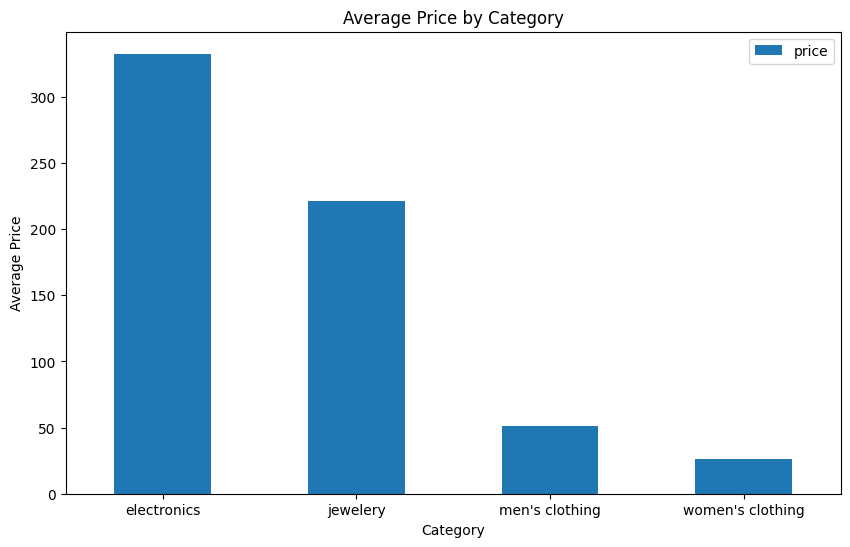

In [12]:
avgpricecategory = avgpricecategory.reset_index()

avgpricecategory.plot(kind='bar', x='category', y='price', figsize=(10, 6))


plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price by Category')
plt.xticks(rotation = 0)

plt.show()


